# male population and hk recycling volume per capita

Model Summary:
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          5.1090      0.758      6.743      0.000       3.517       6.701
Male population (mid-year) -1.431e-06   2.26e-07     -6.317      0.000   -1.91e-06   -9.55e-07

R-squared: 0.6891


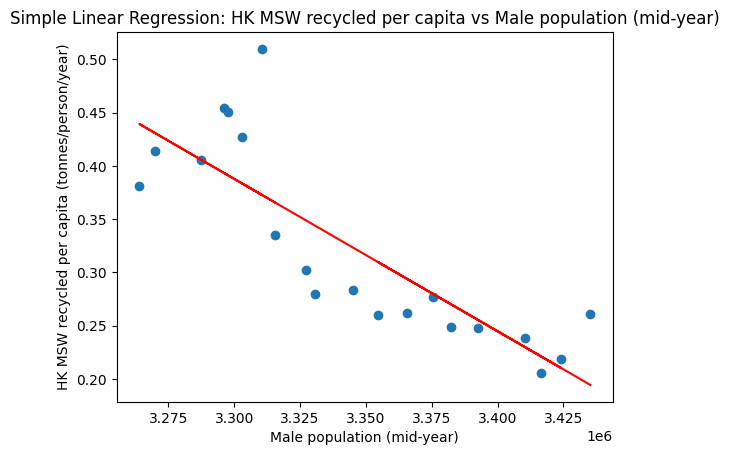

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per capita vs Male population (mid-year)

# Prepare data
df['Male population (mid-year)'] = pd.to_numeric(
    df['Male population (mid-year)'], errors='coerce'
)
df['HK total MSW recycled (tonnes)'] = pd.to_numeric(
    df['HK total MSW recycled (tonnes)'], errors='coerce'
)
df['HK total population (mid-year)'] = pd.to_numeric(
    df['HK total population (mid-year)'], errors='coerce'
)

# Calculate yearly MSW recycled per capita (tonnes per person per year)
df['HK MSW recycled per capita (tonnes/person/year)'] = (
    df['HK total MSW recycled (tonnes)'] / df['HK total population (mid-year)']
)

# Prepare data
X2 = df[['Male population (mid-year)',
         'HK MSW recycled per capita (tonnes/person/year)']].dropna()
y = df.loc[X2.index, 'HK MSW recycled per capita (tonnes/person/year)']
X2 = X2[['Male population (mid-year)']]

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('Male population (mid-year)')
plt.ylabel('HK MSW recycled per capita (tonnes/person/year)')
plt.title('Simple Linear Regression: HK MSW recycled per capita vs Male population (mid-year)')
plt.show()


**Male population coefficient ($\hat \beta_1$) ≈ −1.43 × 10^{-6} (p < 0.001 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong’s male mid-year population and the **MSW recycled per capita per year**. As the male population increases, the amount of waste recycled **per person** tends to **decrease slightly**, indicating weaker per-capita recycling performance when the male population is larger.  

- The **R-squared is relatively high (~0.69)**, meaning male population size explains **around 69% of the variation** in per-capita recycling volume; the remaining variation is likely influenced by other factors such as recycling policies, economic conditions, market demand for recyclables, and residents’ recycling behaviour.
